<a href="https://colab.research.google.com/github/revindaamalias/SCIFEST/blob/main/face_recognition_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import tensorflow as tf
import keras
import scipy
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_dir="F:\SUCOFINDO\Original Images"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 2562 images belonging to 31 classes.


In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [24]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_5 (Bat  (None, 111, 111, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                      

In [25]:

history = model.fit(train_ds,epochs= 10, batch_size=32)

Epoch 1/10
81/81 [==============================] - 148s 2s/step - loss: 3.4460 - accuracy: 0.0898
Epoch 2/10
81/81 [==============================] - 124s 2s/step - loss: 2.7458 - accuracy: 0.2209
Epoch 3/10
81/81 [==============================] - 131s 2s/step - loss: 2.3123 - accuracy: 0.3181
Epoch 4/10
81/81 [==============================] - 127s 2s/step - loss: 1.8964 - accuracy: 0.4325
Epoch 5/10
81/81 [==============================] - 132s 2s/step - loss: 1.5542 - accuracy: 0.5336
Epoch 6/10
81/81 [==============================] - 135s 2s/step - loss: 1.3616 - accuracy: 0.5945
Epoch 7/10
81/81 [==============================] - 138s 2s/step - loss: 1.0607 - accuracy: 0.6807
Epoch 8/10
81/81 [==============================] - 146s 2s/step - loss: 0.7813 - accuracy: 0.7728
Epoch 9/10
81/81 [==============================] - 140s 2s/step - loss: 0.5898 - accuracy: 0.8322
Epoch 10/10
81/81 [==============================] - 140s 2s/step - loss: 0.6685 - accuracy: 0.7927


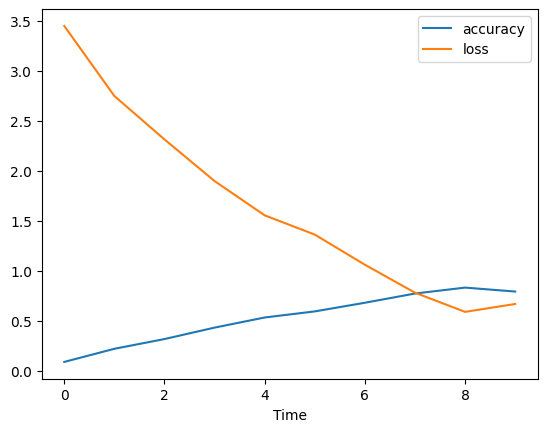

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [27]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

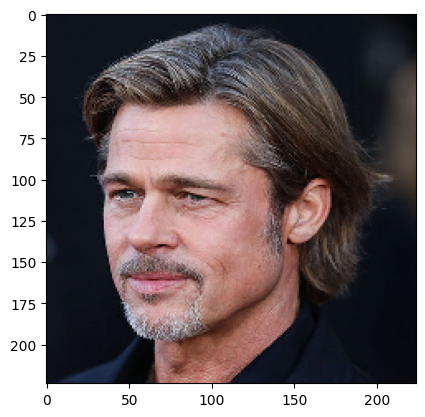

1/1 [==============================] - 0s 178ms/step
Actual: F:\SUCOFINDO\Original Images\Brad Pitt\Brad Pitt
Predicted: Camila Cabello


In [28]:
predict_image("F:\SUCOFINDO\Original Images\Brad Pitt\Brad Pitt_102.jpg")

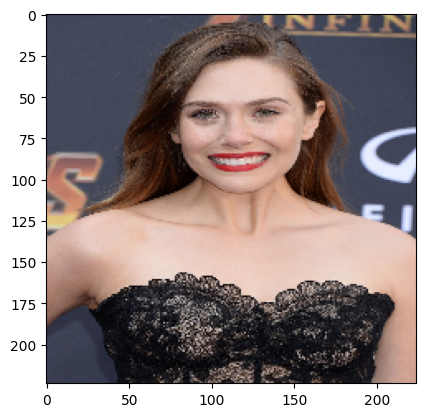

1/1 [==============================] - 0s 40ms/step
Actual: F:\SUCOFINDO\Original Images\Elizabeth Olsen\Elizabeth Olsen
Predicted: Elizabeth Olsen


In [29]:
predict_image("F:\SUCOFINDO\Original Images\Elizabeth Olsen\Elizabeth Olsen_2.jpg")